In [124]:
import pandas as pd 
import yfinance as yf 
import matplotlib.pyplot as plt 
import numpy as np 
import scipy.stats as stats
pd.options.display.float_format = '{:.4f}'.format 
plt.style.use('seaborn') 

1. Calculate Boeing´s Investment Multiple

2. Calculate Boeing´s CAGR

3. Calculate Boeing´s Geometric Mean Return

4. Calculate Boeing´s Investment Multiple with compound daily returns

In [125]:
start = '2015-01-02' 
end = '2020-12-31'
symbol = ['BA'] 

In [126]:
df = yf.download(symbol, start, end) 


[*********************100%***********************]  1 of 1 completed


In [127]:
BA = df.Close.copy() 
BA

Date
2015-01-02   129.9500
2015-01-05   129.0500
2015-01-06   127.5300
2015-01-07   129.5100
2015-01-08   131.8000
               ...   
2020-12-23   219.6900
2020-12-24   217.1500
2020-12-28   216.0900
2020-12-29   216.2500
2020-12-30   216.6700
Name: Close, Length: 1510, dtype: float64

In [128]:
BA = BA.dropna().to_frame()

In [129]:
BA.rename(columns = {'Close':'Price'}, inplace=True) 

In [130]:
BA['Returns'] = BA.Price.pct_change(periods = 1) 

In [131]:
BA = BA[1:] 
BA

,Price,Returns
Date,,
2015-01-05,129.0500,-0.0069
2015-01-06,127.5300,-0.0118
2015-01-07,129.5100,0.0155
2015-01-08,131.8000,0.0177
2015-01-09,131.5400,-0.0020
...,...,...
2020-12-23,219.6900,0.0042
2020-12-24,217.1500,-0.0116
2020-12-28,216.0900,-0.0049


In [132]:
multiple = BA.Price[-1] / BA.Price[0] 
multiple

1.678961588881528

In [133]:
start = BA.index[0] 
end = BA.index[-1] 
td = end - start 
td_years = td.days / 365.25

In [134]:
CAGR = multiple**(1 / td_years) - 1  
CAGR

0.0904384604133377

In [135]:
n = BA.Returns.count() 
geo_mean = multiple**(1/n) - 1 
geo_mean

0.0003434489587677003

In [136]:
comp_daily_ret = (1 + BA.Returns)
comp_daily_ret.to_frame()

,Returns
Date,
2015-01-05,0.9931
2015-01-06,0.9882
2015-01-07,1.0155
2015-01-08,1.0177
2015-01-09,0.9980
...,...
2020-12-23,1.0042
2020-12-24,0.9884
2020-12-28,0.9951


In [137]:
BA

,Price,Returns
Date,,
2015-01-05,129.0500,-0.0069
2015-01-06,127.5300,-0.0118
2015-01-07,129.5100,0.0155
2015-01-08,131.8000,0.0177
2015-01-09,131.5400,-0.0020
...,...,...
2020-12-23,219.6900,0.0042
2020-12-24,217.1500,-0.0116
2020-12-28,216.0900,-0.0049


# Coding Challenge 4

In [138]:
import numpy as np

In [139]:
BA['log_ret'] = np.log(BA.Price / BA.Price.shift())

In [140]:
BA

,Price,Returns,log_ret
Date,,,
2015-01-05,129.0500,-0.0069,NaN
2015-01-06,127.5300,-0.0118,-0.0118
2015-01-07,129.5100,0.0155,0.0154
2015-01-08,131.8000,0.0177,0.0175
2015-01-09,131.5400,-0.0020,-0.0020
...,...,...,...
2020-12-23,219.6900,0.0042,0.0042
2020-12-24,217.1500,-0.0116,-0.0116
2020-12-28,216.0900,-0.0049,-0.0049


In [141]:
IM = np.exp(BA.log_ret.sum()) #Investment multiple 
IM

1.678961588881524

In [142]:
trading_days_year = 252 

In [143]:
CAGR = np.exp(BA.log_ret.mean() * trading_days_year) 
CAGR

1.0904513159544236

In [144]:
Normalized_Prices = BA.log_ret.cumsum().apply(np.exp) 
Normalized_Prices

Date
2015-01-05      NaN
2015-01-06   0.9882
2015-01-07   1.0036
2015-01-08   1.0213
2015-01-09   1.0193
              ...  
2020-12-23   1.7024
2020-12-24   1.6827
2020-12-28   1.6745
2020-12-29   1.6757
2020-12-30   1.6790
Name: log_ret, Length: 1509, dtype: float64

In [147]:
BA.to_csv("BA.csv")

# Coding Challenge 5 

1. Calculate daily log returns for Boeing.

2. Use Boeing´s daily log returns to calculate the annualized mean and annualized std (assume 252 trading days per year).

3. Resample to monthly prices and compare the annualized std (monthly) with the annualized std (daily). Any differences?

4. Keep working with monthly data and calculate/visualize the rolling 36 months mean return (annualized).

In [150]:
BA = pd.read_csv('BA.csv', index_col = 'Date', parse_dates = ['Date']) 
BA

,Price,Returns,log_ret
Date,,,
2015-01-05,129.0500,-0.0069,NaN
2015-01-06,127.5300,-0.0118,-0.0118
2015-01-07,129.5100,0.0155,0.0154
2015-01-08,131.8000,0.0177,0.0175
2015-01-09,131.5400,-0.0020,-0.0020
...,...,...,...
2020-12-23,219.6900,0.0042,0.0042
2020-12-24,217.1500,-0.0116,-0.0116
2020-12-28,216.0900,-0.0049,-0.0049


In [152]:
ann_mu = BA.log_ret.mean() * 252 
print("Annualized mean: {}".format(ann_mu))

Annualized mean return: 0.08659166187978547


In [153]:
ann_std = BA.log_ret.std() * np.sqrt(252) 
print('Annualized std: {}'.format(ann_std))

Annualized std: 0.42700310185703205


In [154]:
monthly = BA.Price.resample('M').last() 
monthly

Date
2015-01-31   145.3700
2015-02-28   150.8500
2015-03-31   150.0800
2015-04-30   143.3400
2015-05-31   140.5200
               ...   
2020-08-31   171.8200
2020-09-30   165.2600
2020-10-31   144.3900
2020-11-30   210.7100
2020-12-31   216.6700
Freq: M, Name: Price, Length: 72, dtype: float64

In [157]:
mon_mu = np.log(monthly / monthly.shift()).mean() * 12 
mon_std = np.log(monthly / monthly.shift()).std() * np.sqrt(12) 
print('annual standardized (monthly) mean: {}'.format(mon_mu))
print('annual standardized (monthly) std: {}'.format(mon_std))

annual standardized (monthly) mean: 0.06745238322563665
annual standardized (monthly) std: 0.4145216754870617


In [163]:
window = 36  
mon_log_ret = np.log(monthly / monthly.shift())

In [164]:
roll_mean = mon_log_ret.rolling(window).mean() * 12 
roll_mean

Date
2015-01-31       NaN
2015-02-28       NaN
2015-03-31       NaN
2015-04-30       NaN
2015-05-31       NaN
               ...  
2020-08-31   -0.1109
2020-09-30   -0.1435
2020-10-31   -0.1935
2020-11-30   -0.0909
2020-12-31   -0.1028
Freq: M, Name: Price, Length: 72, dtype: float64

In [165]:
roll_std = mon_log_ret.rolling(window).std() * np.sqrt(12) 
roll_std

Date
2015-01-31      NaN
2015-02-28      NaN
2015-03-31      NaN
2015-04-30      NaN
2015-05-31      NaN
              ...  
2020-08-31   0.4855
2020-09-30   0.4841
2020-10-31   0.4890
2020-11-30   0.5375
2020-12-31   0.5362
Freq: M, Name: Price, Length: 72, dtype: float64

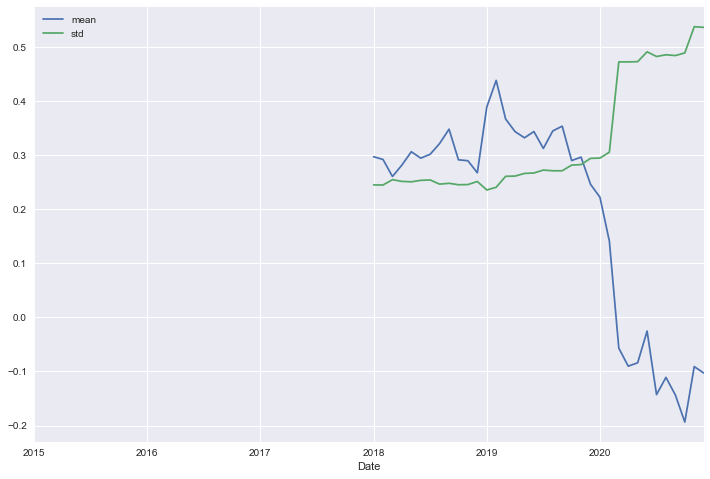

In [168]:
roll_mean.plot(figsize=(12,8)) 
roll_std.plot()  
plt.legend(labels=['mean','std'])
plt.show()

## Coding Challenge 6 
1. Calculate daily log returns for Boeing.

2. Calculate the annualized mean and annualized std (assume 252 trading days per year) for a short position in Boeing (ignore Trading and Borrowing Costs).

In [169]:
BA

,Price,Returns,log_ret
Date,,,
2015-01-05,129.0500,-0.0069,NaN
2015-01-06,127.5300,-0.0118,-0.0118
2015-01-07,129.5100,0.0155,0.0154
2015-01-08,131.8000,0.0177,0.0175
2015-01-09,131.5400,-0.0020,-0.0020
...,...,...,...
2020-12-23,219.6900,0.0042,0.0042
2020-12-24,217.1500,-0.0116,-0.0116
2020-12-28,216.0900,-0.0049,-0.0049


In [170]:
ann_mu = BA.log_ret.mean() * 252 #annualized mean return
ann_mu

0.08659166187978547

In [172]:
ann_std = BA.log_ret.std() * np.sqrt(252) #annualized std of returns  
ann_std

0.42700310185703205